# Getting started 

Name: Boston Airbnb Popularity Analysis

Source: https://www.kaggle.com/airbnb/boston

Business questions: 
1.	Which area in Boston is the most popular place in which to live?
2.	What is the average price of a home in each neighborhood in Boston?
3.	What factors will affect the popularity of the Airbnb in Boston?


## Exploring the Dataset

In [84]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot

%matplotlib inline

### Load the dataset and get the basic information of the dataset

In [85]:
df = pd.read_csv('boston-airbnb-open-data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [86]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

### Exploring zipcode, city and neighbourhood to determine which feature we want to use to address our business questions.

#### Exploring price by zipcode

In [88]:
df_zipcode = df.dropna(subset=['zipcode']).copy()
# Remove some irregular zipcode
df_zipcode['zipcode'] = df_zipcode['zipcode'].str[:5].values
# Remove $ out of the price
df_zipcode['price'] = df_zipcode['price'].replace('[\$,]', '', regex=True).astype(float)
df_zipcode.groupby('zipcode').mean()['price']

zipcode
02108    231.780822
02109    238.941176
02110    274.076923
02111    253.535354
02113    190.158416
02114    213.238095
02115    195.065089
02116    229.180412
02118    217.789474
02119    126.110000
02120    126.173913
02121    101.310345
02122    114.409091
02124     81.200000
02125     95.527132
02126     80.958333
02127    189.938889
02128    119.684932
02129    221.844444
02130    138.746224
02131     96.907692
02132    103.783784
02134    108.712446
02135    120.395349
02136     88.793103
02138    221.500000
02139    190.166667
02141    150.000000
02142    270.000000
02143     95.571429
02145     89.833333
02163     86.666667
02169     25.000000
02186     50.000000
02210    313.440000
02215    225.546610
02218    169.000000
02445     92.800000
02446    178.500000
02467     80.400000
02472     60.000000
Name: price, dtype: float64

#### Explore the number of reviews by city 

In [89]:
df_city = df.dropna(subset=['city']).copy()
df_city.groupby('city').mean()["review_scores_value"]

city
ALLSTON                       7.000000
Allston                       8.800000
Boston                        9.166157
Boston                       10.000000
Boston (Charlestown)          8.000000
Boston (Jamaica Plain)       10.000000
Boston, Massachusetts, US          NaN
Brighton                      9.333333
Brighton                      9.000000
Brookline                     9.428571
Cambridge                     8.833333
Charlestown                   9.692308
Dorchester                    9.769231
East Boston                   9.000000
Hyde Park                     9.000000
Jamaica Plain                 9.411765
Jamaica Plain                10.000000
Jamaica Plain (Boston)        9.000000
Jamaica Plain, Boston         9.500000
Jamaica Plain, MA            10.000000
Jamaica plain                      NaN
Mattapan                      9.000000
Milton                        9.000000
Mission Hill, Boston         10.000000
Newton                             NaN
ROXBURY CROSSING    

#### Explore the bathrooms and bedrooms information

In [90]:
df.groupby(['bathrooms', 'bedrooms']).count()

id  listing_url  scrape_id  last_scraped  name  summary  \
bathrooms bedrooms                                                              
0.0       0.0          1            1          1             1     1        1   
          1.0         12           12         12            12    12       11   
0.5       1.0          7            7          7             7     7        7   
1.0       0.0        284          284        284           284   284      281   
          1.0       2036         2036       2036          2036  2036     1971   
          2.0        360          360        360           360   360      339   
          3.0         55           55         55            55    55       55   
          4.0          5            5          5             5     5        4   
          5.0          1            1          1             1     1        1   
1.5       0.0          1            1          1             1     1        1   
          1.0        130          130        130           130   130      123   
          2.0         54           54         54            54    54       48   
          3.0         17           17         17            17    17       16   
          4.0          3            3          3             3     3        3   
          5.0          3            3          3             3     3        3   
2.0       1.0        131          131        131           131   131      129   
          2.0        264          264        264           264   264      253   
          3.0         56           56         56            56    56       52   
          4.0         21           21         21            21    21       19   
          5.0          6            6          6             6     6        6   
2.5       1.0         31           31         31            31    31       30   
          2.0         13           13         13            13    13       13   
          3.0         14           14         14            14    14       14   
          4.0          8            8          8             8     8        8   
          5.0          2            2          2             2     2        2   
3.0       1.0          7            7          7             7     7        7   
          3.0         10           10         10            10    10        9   
          4.0          2            2          2             2     2        2   
          5.0          2            2          2             2     2        2   
3.5       0.0          1            1          1             1     1        1   
          1.0          4            4          4             4     4        4   
          3.0          3            3          3             3     3        3   
          4.0          4            4          4             4     4        4   
          5.0          1            1          1             1     1        1   
4.0       4.0          2            2          2             2     2        2   
4.5       5.0          1            1          1             1     1        1   
5.0       1.0          4            4          4             4     4        4   
          2.0          1            1          1             1     1        1   
6.0       1.0          4            4          4             4     4        4   

                    space  description  experiences_offered  \
bathrooms bedrooms                                            
0.0       0.0           1            1                    1   
          1.0          11           12                   12   
0.5       1.0           3            7                    7   
1.0       0.0         207          284                  284   
          1.0        1366         2036                 2036   
          2.0         269          360                  360   
          3.0          45           55                   55   
          4.0           5            5                    5   
          5.0           0            1                    1   
1.5    

In [91]:
df['neighbourhood_cleansed'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston', 'Allston'], dtype=object)

#### Explore the neighbourhood

We choose the `neighbourhood` finally after the analysis. 

Additionally, check the difference between the features `neighbourhood_cleansed` and `neighbourhood` to decide which one we should use. Then we pick the `neighbourhood_cleansed`. 

In [92]:
df['neighbourhood'].unique(), df['neighbourhood_cleansed'].unique()

(array(['Roslindale', nan, 'Jamaica Plain', 'Mission Hill',
        'Fenway/Kenmore', 'Back Bay', 'Leather District', 'Chinatown',
        'Hyde Park', 'North End', 'Roxbury', 'South End', 'Mattapan',
        'East Boston', 'South Boston', 'Charlestown', 'West End',
        'Beacon Hill', 'Theater District', 'Downtown Crossing', 'Downtown',
        'Financial District', 'Government Center', 'Allston-Brighton',
        'West Roxbury', 'Chestnut Hill', 'Dorchester', 'Brookline',
        'Cambridge', 'Somerville', 'Harvard Square'], dtype=object),
 array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
        'Longwood Medical Area', 'Bay Village', 'Leather District',
        'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
        'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
        'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
        'Mattapan', 'Dorchester', 'South Boston Waterfront',
        'South Boston', 'Allston'], dtype=object))

There is no missing value in our targeted columns:neighbourhood_cleansed, number_of_reviews and price, but we need to deal with missing value in review_scores_rating column, and convert the type from string to float in price column. Then we visualize the bar chart to answer the business questions.

In [93]:
sns.set(rc={'figure.figsize':(20, 10)})

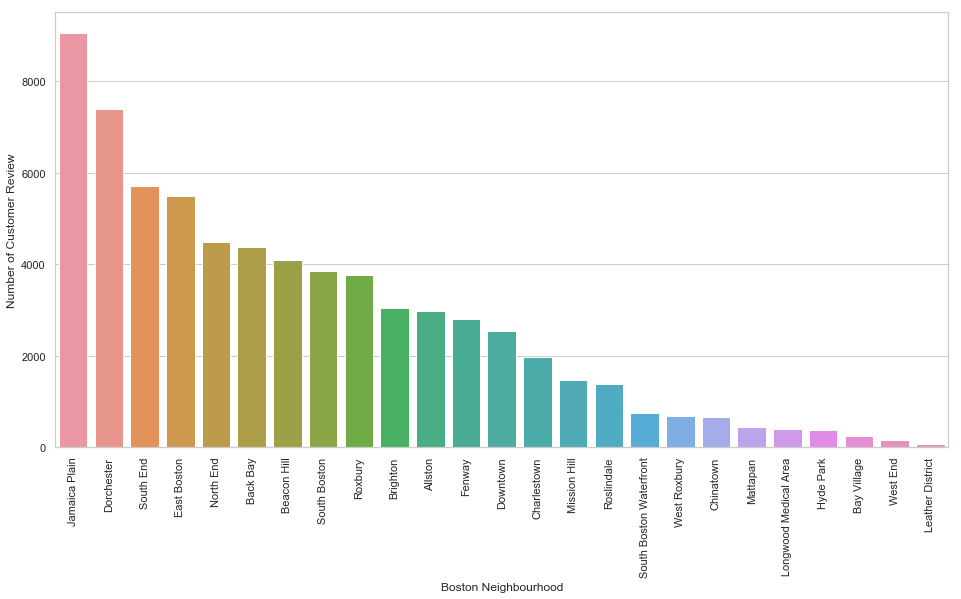

In [94]:
# Visualize Figure 2: Number of reviews in each area
neighbour_number_review = df.groupby('neighbourhood_cleansed').sum()['number_of_reviews'].sort_values(ascending=False)
neighbour_number_review = neighbour_number_review.to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x="neighbourhood_cleansed", y='number_of_reviews', data=neighbour_number_review)
plt.xticks(rotation='vertical')
plt.xlabel('Boston Neighbourhood')
plt.ylabel('Number of Customer Review');

<Figure size 1152x576 with 0 Axes>

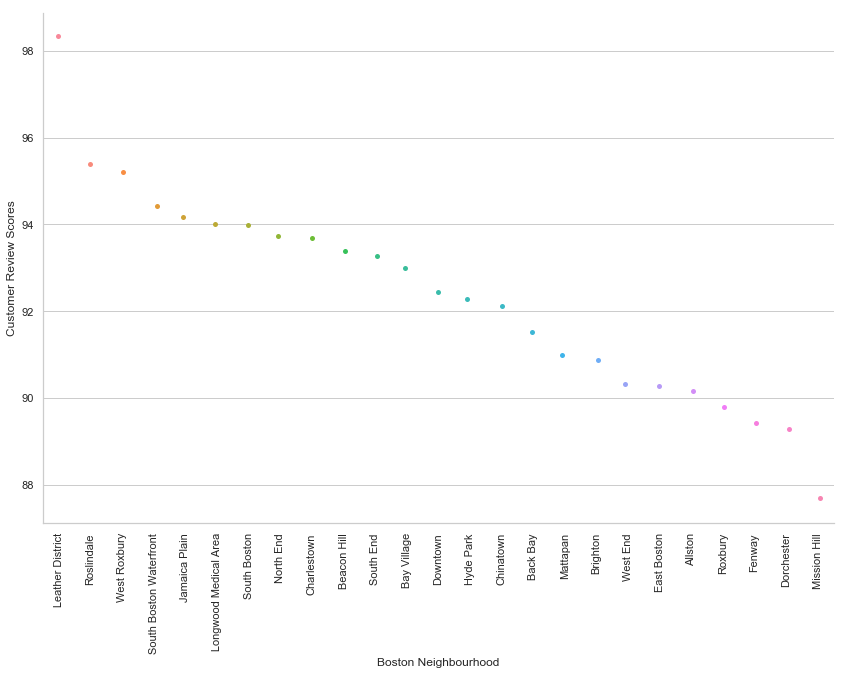

In [95]:
# Visualize Figure 3: Average customer rating scores in each area
df_dropna_rating = df.dropna(subset=['review_scores_rating'])
neighbour_review_rating = df_dropna_rating.groupby('neighbourhood_cleansed').mean()['review_scores_rating'].sort_values(ascending=False)
neighbour_review_rating = neighbour_review_rating.to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.catplot(x="neighbourhood_cleansed", y='review_scores_rating', data=neighbour_review_rating, 
            kind='strip', height=8, aspect=1.5)
plt.xticks(rotation='vertical')
plt.xlabel('Boston Neighbourhood')
plt.ylabel('Customer Review Scores');



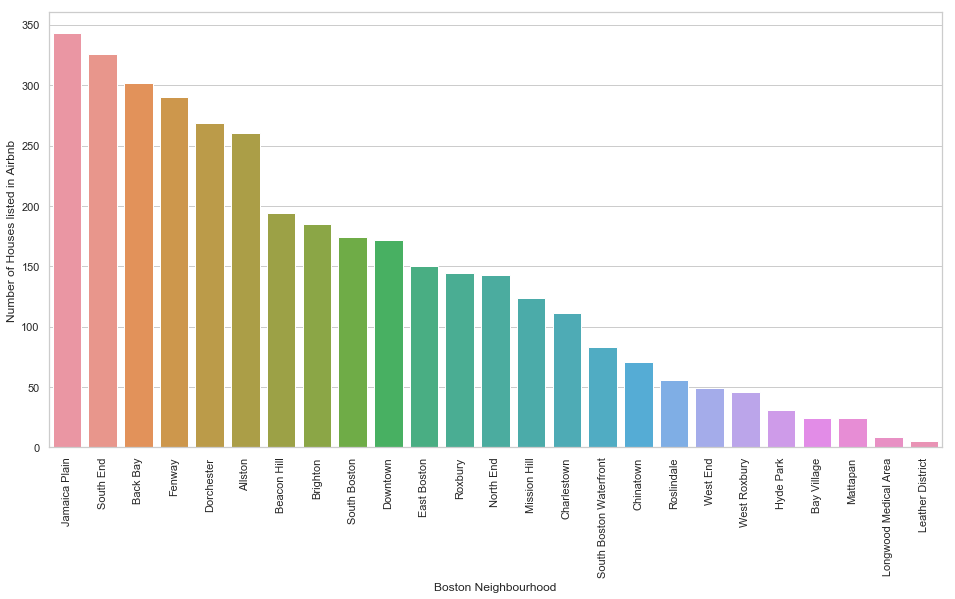

In [96]:
# Visualize Figure 4: Number of houses available in each area
df_neighbourhood_counts = df['neighbourhood_cleansed'].value_counts().reset_index()
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x="index", y='neighbourhood_cleansed', data=df_neighbourhood_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Boston Neighbourhood')
plt.ylabel('Number of Houses listed in Airbnb');

In [97]:
# Convert the `price` and `clearning_fee` column to float (i.e. '$100' -->> 100.0)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
# Fill the null value in cleaning_fee column with zero
# then calculate the total price the customer should pay for renting
df['cleaning_fee'].fillna(0, inplace=True)
df['total_price'] = df['price'] + df['cleaning_fee']

In [98]:
# check the total price after calculating
df[['price', 'cleaning_fee', 'total_price']].head()

,price,cleaning_fee,total_price
0,250.0,35.0,285.0
1,65.0,10.0,75.0
2,65.0,0.0,65.0
3,75.0,50.0,125.0
4,79.0,15.0,94.0


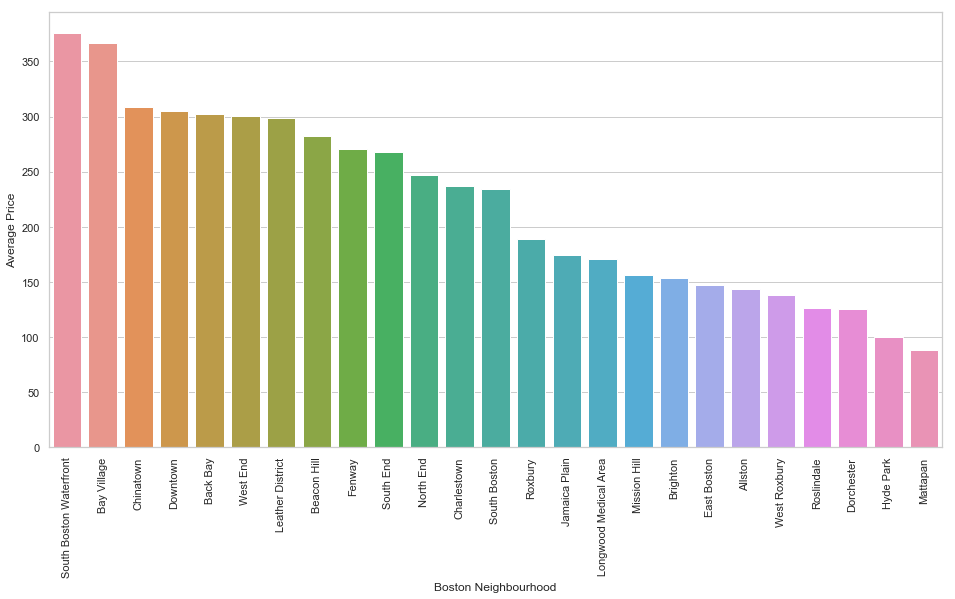

In [99]:
# Visualize Figure 5: Average price of rental houses in each area
neighbour_price = df.groupby('neighbourhood_cleansed').mean()['total_price'].sort_values(ascending=False)
neighbour_price_reset = neighbour_price.to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x="neighbourhood_cleansed", y='total_price', data=neighbour_price_reset)
plt.xticks(rotation='vertical')
plt.xlabel('Boston Neighbourhood')
plt.ylabel('Average Price');

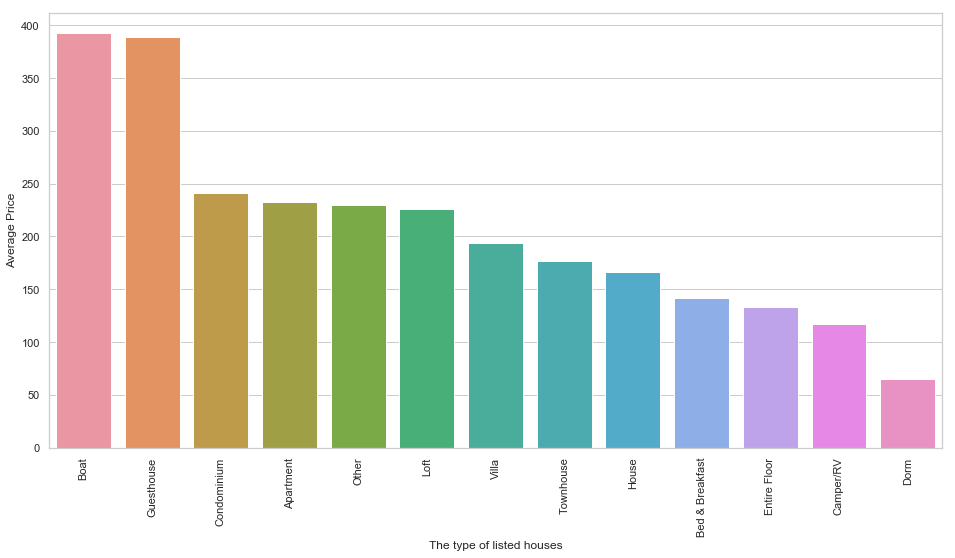

In [100]:
# Visualize Figure 6: Average price of each type of the rental houses
neighbour_price = df.groupby('property_type').mean()['total_price'].sort_values(ascending=False)
neighbour_price_reset = neighbour_price.to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x="property_type", y='total_price', data=neighbour_price_reset)
plt.xticks(rotation='vertical')
plt.xlabel('The type of listed houses')
plt.ylabel('Average Price');

In [101]:
def neighbour_property(data, neighbour_name):
    """Stat neighbourhood by property type
    
    Parameters
    -----------
    data: pandas.dataframe
          The pre-processed dataframe
    neighbour_name: str
          The name of neighbourhood need to stat
          
    Returns
    ----------
    pandas.dataframe: contain 'Count' and 'Average Price' columns
    """
    group = data[data['neighbourhood_cleansed'] == neighbour_name].groupby('property_type')
    return group['total_price'].agg([('Count', 'count'), ('Average Price', 'mean')]).reset_index()

def plot_count_average(data, x='property_type', y1='Average Price', y2='Count'):
    """Plot the Count and AVG price of property type at specific neighbourhood
    
    Parameters
    -----------
    data: pandas.dataframe
    x: str
       column name for X axis, default='property_type'
    y1: str
       column name for Y1 axis, default='Average Price'
    y2: str
       column name for Y2 axis, default='Count'
       
    Returns
    ----------
    None
    """
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=x, y=y1, data=data)
    # Plot Count value of `property_type` along with Average Price
    ax2 = ax.twinx()
    ax2.grid(None)
    sns.lineplot(x=x, y=y2, ax=ax2, data=data, color='Red')
    ax.set_xlabel('The type of Listed Houses')

  property_type  Count  Average Price
0     Apartment     74     389.756757
1   Condominium      3     338.333333
2         House      1     125.000000
3          Loft      4     242.250000
4         Other      1     220.000000


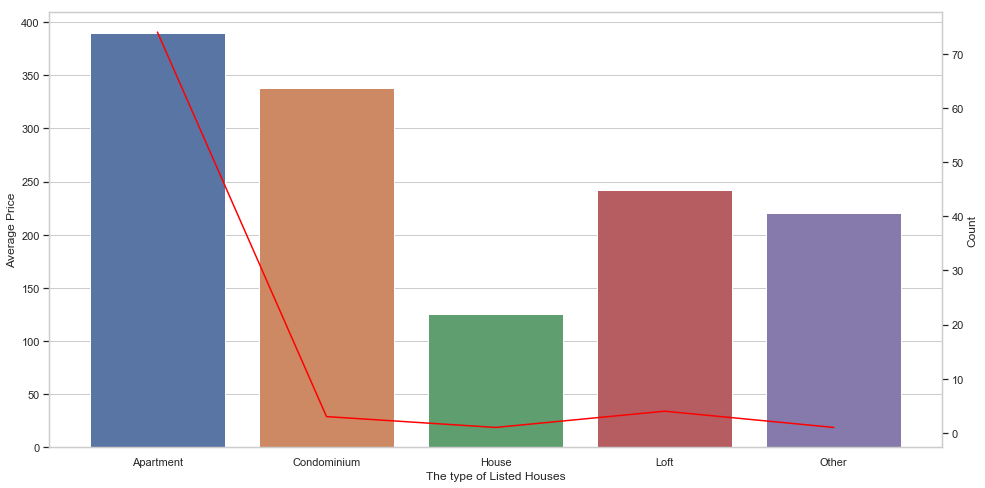

In [102]:
# Visualize Figure 7: Number of each property available in South Boston Waterfront (line) and its average price (bar)
waterfront_property = neighbour_property(df, 'South Boston Waterfront')
print(waterfront_property)
plot_count_average(waterfront_property)


     property_type  Count  Average Price
0        Apartment     13     286.076923
1  Bed & Breakfast      2     146.000000
2      Condominium      2     249.500000
3       Guesthouse      1     389.000000
4            House      5     679.800000
5        Townhouse      1     500.000000


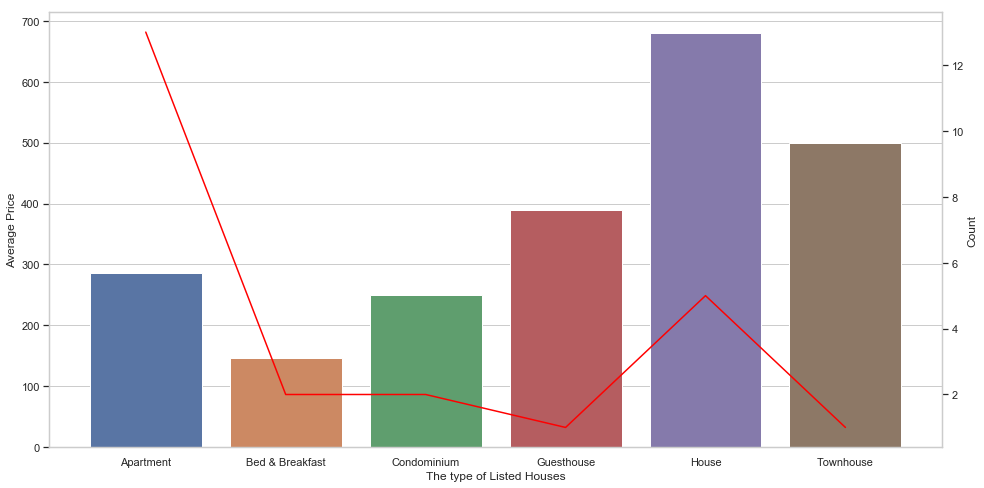

In [103]:
# Visualize Figure 8: Number of each property available in Bay Village (line) and its average price (bar)
bayvillage_property = neighbour_property(df, 'Bay Village')
print(bayvillage_property)
plot_count_average(bayvillage_property)


In [104]:
# # visualize the number of aprtments and price in each area 
# apartment_group = df[df['property_type'] == 'Apartment'].groupby('neighbourhood_cleansed')
# apartment_neighborhood = apartment_group['total_price'].agg([('Count', 'count'), ('Average Price', 'mean')]).reset_index()

# plot_count_average(apartment_neighborhood, x='neighbourhood_cleansed')


In [105]:
# two_area_comp = df[(df['neighbourhood_cleansed'] == 'Bay Village' ) | (df['neighbourhood_cleansed'] == 'South Boston Waterfront')]
# sns.catplot(x="property_type", y='total_price', data=two_area_comp, 
#             kind='strip', height=8, aspect=1.5)


### Visualize the distribution of the Airbnb listing houses in Boston on Goolge Map

In [106]:
gapikey='<Google API Key>'
# Get latitude and longitude
latitude_list = list(df['latitude'])
longitude_list = list(df['longitude'])

# Initialize 'Boston, MA' Google Map
gmap = gmplot.GoogleMapPlotter(42.3143286,-71.040323, 12, apikey=gapikey)
  
# Plot heatmap upon the Google map 
gmap.heatmap(latitude_list, longitude_list) 
# Save as HTML file
gmap.draw("boston_airbnb_heatmap.html")

### Manually select the 31 out of 95 features
Calculate the correlation between each of them and evaluate them by illustrating them in the following heatmap

In [107]:
columns_sel = ['host_response_rate','host_acceptance_rate', 'host_is_superhost',
               'host_total_listings_count','host_has_profile_pic', 'host_identity_verified',
               'neighbourhood_cleansed','is_location_exact', 'property_type', 'room_type', 
               'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet', 
               'price', 'weekly_price', 'monthly_price', 'security_deposit',
               'cleaning_fee', 'guests_included', 'extra_people', 'availability_30', 
               'number_of_reviews','review_scores_rating',
               'instant_bookable','cancellation_policy', 'require_guest_profile_picture',
               'require_guest_phone_verification', 'calculated_host_listings_count']

columns_cat = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
               'neighbourhood_cleansed','is_location_exact', 'property_type', 'room_type', 
               'bed_type', 'instant_bookable','cancellation_policy', 
               'require_guest_profile_picture', 'require_guest_phone_verification']

df_select = df[columns_sel].copy()

for col in columns_cat:
    df_select[col] = df_select[col].astype('category').cat.codes

# Remove '%' out of `rate` column
df_select['host_response_rate'] = df_select['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_select['host_acceptance_rate'] = df_select['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

df_select.fillna(0, inplace=True)
# Remove $ out of the price
values=['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for column in values:
    df_select[column]=df_select[column].replace('[\$,]', '', regex=True).astype(float)

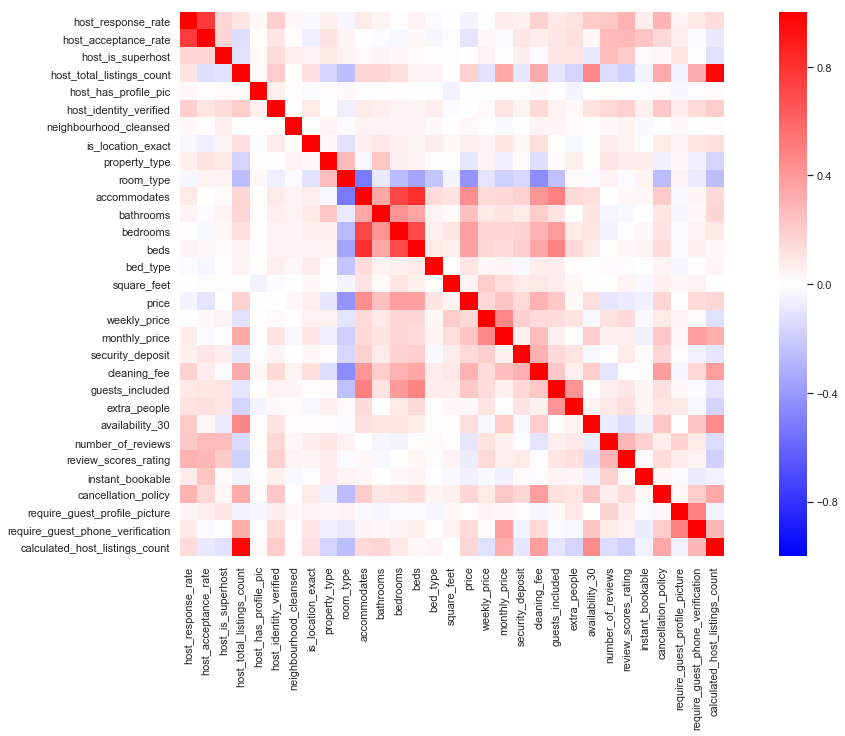

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(df_select.corr(), center=0, vmin=-1, vmax=1, square=True, cmap="bwr");